In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('income.csv')
df=df.drop(['Name'],axis=1)

In [3]:
df.shape

(22, 2)

In [4]:
import matplotlib.pyplot as plt

In [5]:
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


Text(0, 0.5, 'Income($)')

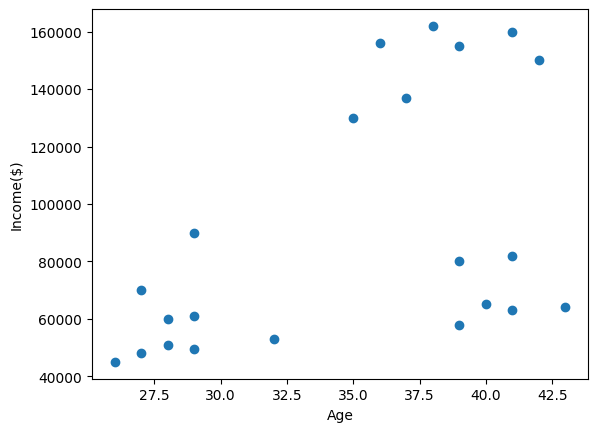

In [6]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [7]:
from sklearn.cluster import KMeans

In [8]:
sse=[]
for k in range(2,11):
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

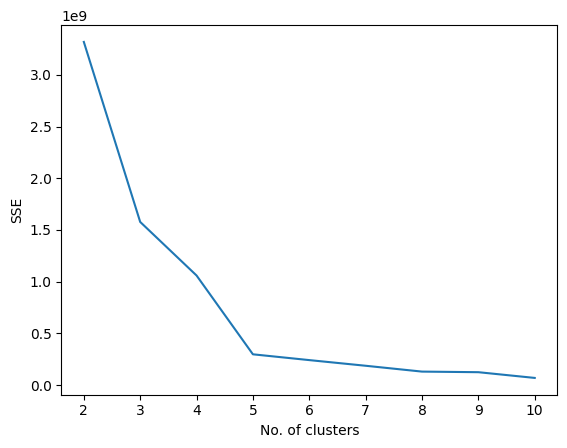

In [9]:
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.plot(range(2,11),sse)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [11]:
df['Income($)']=scaler.fit_transform(df[['Income($)']])
df['Age']=scaler.fit_transform(df[['Age']])

In [12]:
km_model=KMeans(n_clusters=3)
prediction=km_model.fit_predict(df[['Age','Income($)']])

In [13]:
prediction

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [14]:
df['Clusters']=prediction
df

,Age,Income($),Clusters
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


In [15]:
km_model.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [16]:
df1=df[df['Clusters']==0]
df2=df[df['Clusters']==1]
df3=df[df['Clusters']==2]

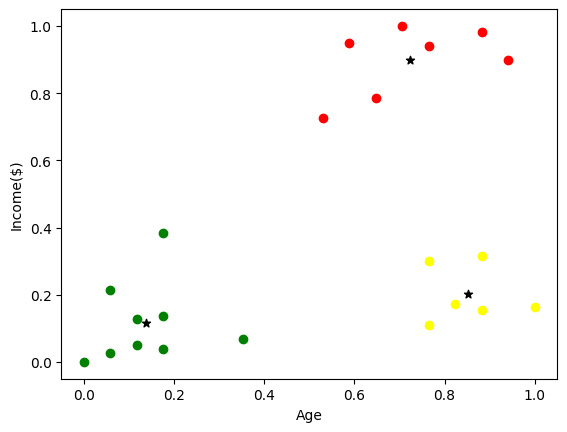

In [20]:
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
plt.scatter(df3['Age'],df3['Income($)'],color='yellow')
plt.xlabel('Age')
plt.ylabel('Income($)')
centers=km_model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],marker='*',color='black')